# Proyecto práctico (Clasificación bincaria)

In [1]:
# --- LIBRERÍAS ---
import pandas as pd                             # Para manipulación de datos en estructuras tipo DataFrame
import numpy as np                              # Para operaciones numéricas
import matplotlib.pyplot as plt                 # Para generar gráficos
import seaborn as sns                           # Para visualizaciones estadísticas atractivas
import pickle                                   # Para guardar y cargar objetos de Python (modelo entrenado)
from sklearn.datasets import load_breast_cancer # Dataset predefinido de cáncer de mama
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict  # Validación cruzada estratificada
from sklearn.preprocessing import StandardScaler  # Escalado estándar de características
from sklearn.neighbors import KNeighborsClassifier # Algoritmo K-Nearest Neighbors
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # Métricas de evaluación

In [2]:
# --- 1. CARGA DE DATOS ---
cancer = load_breast_cancer()                  # Carga el dataset de cáncer de mama
X_raw = cancer.data                            # Obtiene las características (matriz X)
y = cancer.target                              # Obtiene las etiquetas (vector y)
features = cancer.feature_names                # Obtiene los nombres de las características
target_names = cancer.target_names             # Obtiene los nombres de las clases (benigno/maligno)

# Mostrar número de filas y columnas
print(f"El dataset tiene {X_raw.shape[0]} filas y {X_raw.shape[1]} columnas (características).")

El dataset tiene 569 filas y 30 columnas (características).


In [3]:
# --- 2. CONVERSIÓN A DATAFRAME ---
df = pd.DataFrame(X_raw, columns=features)     # Crea un DataFrame con las características
df['target'] = y                               # Añade la columna de etiquetas numéricas
df['target_name'] = df['target'].apply(lambda x: target_names[x])  # Añade el nombre de la clase (texto)


Primeras filas del dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  wo

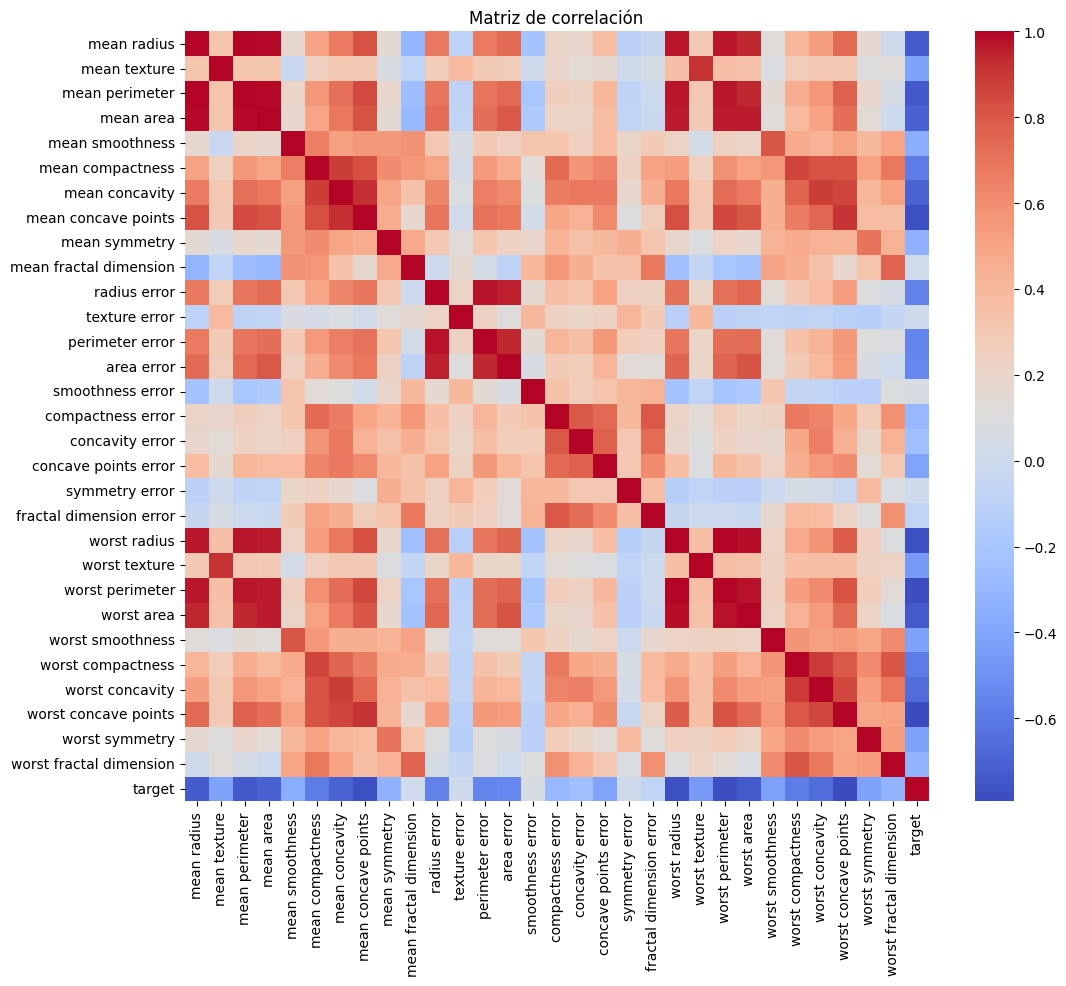

C:\Users\AdrianGilGamboa\AppData\Local\Temp\ipykernel_2932\2597440819.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_name', data=df, palette='Set2')


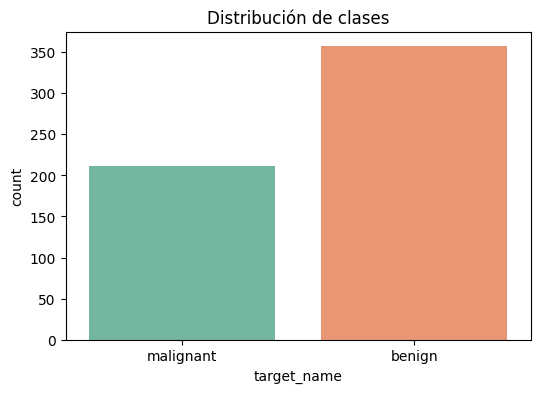

Número de instancias por clase:
target_name
benign       357
malignant    212
Name: count, dtype: int64


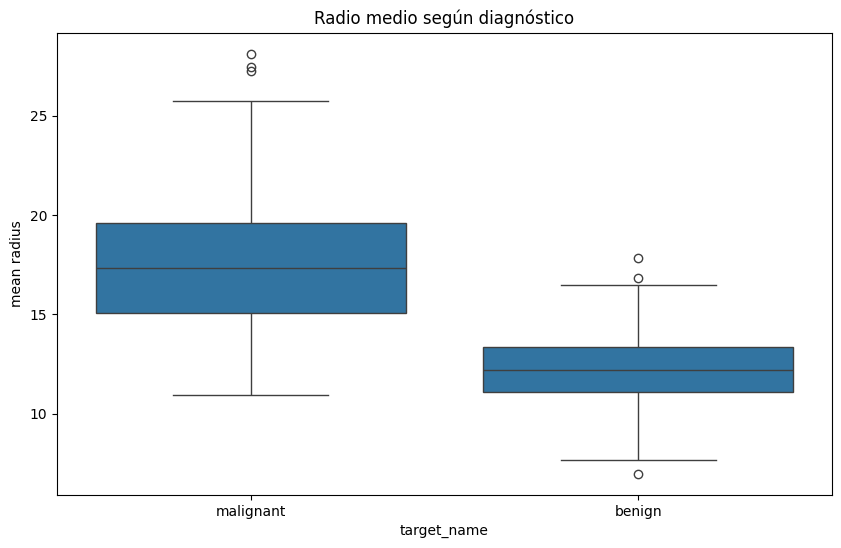

In [4]:
# --- 3. ANÁLISIS EXPLORATORIO ---
print("\nPrimeras filas del dataset:")         # Muestra las primeras filas del DataFrame
print(df.head())

print("\nDistribución de clases:")             # Muestra la cantidad de muestras por clase
print(df['target_name'].value_counts())

# Estadísticas descriptivas de las características
print("\nEstadísticas descriptivas:")
print(df.describe())

# Visualización: matriz de correlación entre características
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Matriz de correlación")
plt.show()

# Visualización: distribución de clases (conteo)
plt.figure(figsize=(6, 4))
sns.countplot(x='target_name', data=df, palette='Set2')
plt.title("Distribución de clases")
plt.show()

# Mostrar número de instancias por clase en texto
print("Número de instancias por clase:")
print(df['target_name'].value_counts())

# Visualización: diagrama de caja del radio medio por clase
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['mean radius', 'target_name']], x='target_name', y='mean radius')
plt.title("Radio medio según diagnóstico")
plt.show()

In [7]:
# --- 4. PREPROCESAMIENTO ---
X = df[features].values                        # Extrae la matriz de características
scaler = StandardScaler()                     # Crea el objeto para escalado estándar
X_scaled = scaler.fit_transform(X)            # Aplica el escalado (media=0, desviación=1)

In [8]:
# --- 5. MODELO Y VALIDACIÓN CRUZADA ---
knn = KNeighborsClassifier(n_neighbors=5)     # Instancia del clasificador KNN con k=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # División estratificada en 5 folds

# Evaluación con validación cruzada: precisión en cada fold
scores = cross_val_score(knn, X_scaled, y, cv=cv, scoring='accuracy')
print("\nValidación cruzada (5 folds):")
print(f"Scores por fold: {scores}")           # Muestra la precisión por cada fold
print(f"Precisión media: {scores.mean():.4f}")# Muestra la media de precisión
print(f"Desviación estándar: {scores.std():.4f}")  # Muestra la variabilidad entre folds

# Predicciones generadas en cada fold para evaluación posterior
y_pred_cv = cross_val_predict(knn, X_scaled, y, cv=cv)


Validación cruzada (5 folds):
Scores por fold: [0.98245614 0.95614035 0.94736842 0.98245614 0.96460177]
Precisión media: 0.9666
Desviación estándar: 0.0140


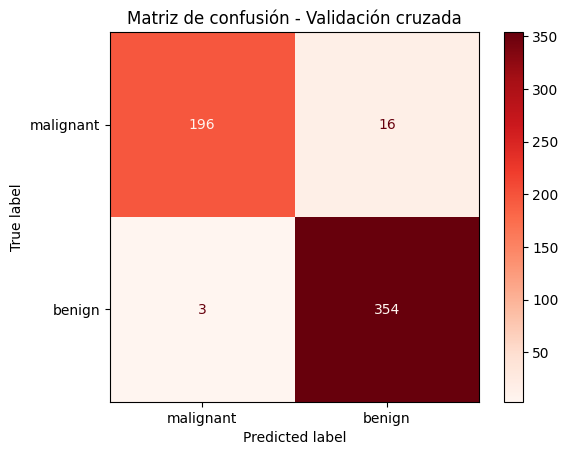


Informe de clasificación (validación cruzada):
              precision    recall  f1-score   support

   malignant       0.98      0.92      0.95       212
      benign       0.96      0.99      0.97       357

    accuracy                           0.97       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.97      0.97      0.97       569



In [9]:
# --- 6. EVALUACIÓN DEL MODELO ---
cm = confusion_matrix(y, y_pred_cv)           # Calcula la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)  # Objeto para mostrarla
disp.plot(cmap=plt.cm.Reds)                   # Dibuja la matriz de confusión con mapa de color rojo
plt.title("Matriz de confusión - Validación cruzada")
plt.show()

# Muestra informe con precisión, recall y F1-score
print("\nInforme de clasificación (validación cruzada):")
print(classification_report(y, y_pred_cv, target_names=target_names))

Este informe de clasificación nos ofrece varias métricas que resumen el rendimiento del modelo KNN en la clasificación de tumores malignos y benignos mediante validación cruzada:

Precision (Precisión):
Indica de todas las predicciones hechas para una clase, cuántas fueron correctas.

Para malignant (maligno): 0.98 → El 98% de las veces que el modelo predijo maligno, acertó.

Para benign (benigno): 0.96 → El 96% de las veces que el modelo predijo benigno, acertó.

Recall (Sensibilidad o Exhaustividad):
Indica de todas las muestras reales de una clase, cuántas fueron correctamente identificadas.

Maligno: 0.92 → El 92% de los tumores malignos reales fueron detectados correctamente.

Benigno: 0.99 → El 99% de los tumores benignos reales fueron detectados correctamente.

F1-score:
Es la media armónica entre precisión y recall, equilibrando ambos.

Maligno: 0.95

Benigno: 0.97

Support (Soporte):
Número de muestras reales por clase en el dataset.

212 muestras malignas

357 muestras benignas

Accuracy (Exactitud global):
El porcentaje total de predicciones correctas: 0.97 (97%)

Macro avg:
Promedio simple de las métricas (precisión, recall y f1) sin ponderar por soporte, útil para ver equilibrio entre clases.
Todas alrededor de 0.96-0.97, lo que indica buen rendimiento en ambas clases.

Weighted avg:
Promedio ponderado según soporte (número de muestras por clase), también cercano a 0.97.

In [10]:
# --- 7. GUARDADO DEL MODELO ---
# Entrena el modelo final con todos los datos disponibles
knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(X_scaled, y)

# Guarda el modelo entrenado en un archivo con pickle
with open('modelo_knn.pkl', 'wb') as model_file:
    pickle.dump(knn_final, model_file)

print("\nModelo guardado")


Modelo guardado
